In [40]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

In [41]:
df = pd.read_csv('test_data.csv')
df1 = pd.read_csv('test_data1.csv')


df

,angle,speed,length,depth
0,10,3.55,12.2,1.3
1,20,3.54,10.8,1.5
2,30,3.53,9.0,1.7
3,40,3.53,7.2,1.9
4,50,3.54,6.2,2.2
5,60,3.55,4.5,2.4
6,70,3.56,3.2,2.6
7,80,3.56,2.2,2.7
8,90,3.57,1.2,2.8


In [42]:
df['angle'] = df['angle']*np.pi/180
df1['angle'] = df1['angle']*np.pi/180
df1

,angle,speed,length,depth
0,0.174533,3.54,12.0,1.4
1,0.349066,3.53,10.6,1.5
2,0.523599,3.52,8.8,1.7
3,0.698132,3.51,7.0,1.9
4,0.872665,3.52,6.0,2.1
5,1.047198,3.53,4.3,2.3
6,1.221730,3.54,3.0,2.5
7,1.396263,3.55,2.0,2.6
8,1.570796,3.56,1.0,2.7


In [43]:
def model(x, a, b):
    return a*np.exp(b*x)

init_guess = [1.2, 0.6]

In [44]:
the = df['angle'].to_numpy()
v = df['speed'].to_numpy()
L = df['length'].to_numpy()
D = df['depth'].to_numpy()

the1 = df1['angle'].to_numpy()
v1 = df1['speed'].to_numpy()
L1 = df1['length'].to_numpy()
D1 = df1['depth'].to_numpy()

v

array([3.55, 3.54, 3.53, 3.53, 3.54, 3.55, 3.56, 3.56, 3.57])

In [45]:
vx = v*np.cos(the)
vx1 = v1*np.cos(the1)

vx

array([3.49606752e+00, 3.32651188e+00, 3.05706968e+00, 2.70413688e+00,
       2.27546814e+00, 1.77500000e+00, 1.21759171e+00, 6.18187512e-01,
       2.18599454e-16])

In [46]:
popt, pcov = curve_fit(model, vx, L, p0=init_guess)
a_fit, b_fit = popt

popt_, pcov_ = curve_fit(model, vx1, L1, p0=init_guess)
a_fit_, b_fit_ = popt_

x = np.linspace(min(vx), max(vx), 100)
y = model(x, a_fit, b_fit)

x_ = np.linspace(min(vx1), max(vx1), 100)
y_ = model(x_, a_fit_, b_fit_)

27.83g --R_squared=0.996
16.22g --R_squared=0.996


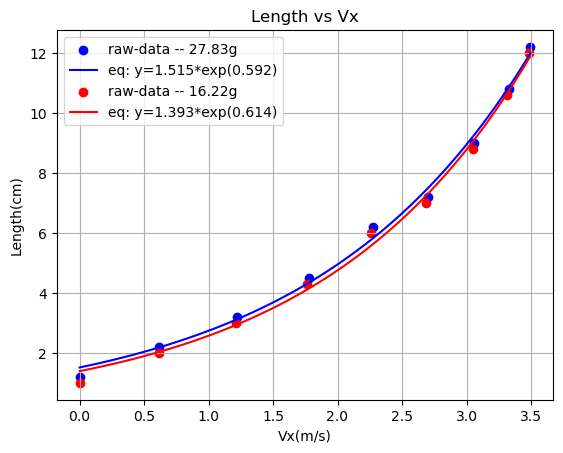

In [ ]:
y_pred = model(vx, a_fit, b_fit)

ss_res = np.sum((L - y_pred)**2)
ss_tot = np.sum((L - np.mean(L))**2)
r_squared = 1 - ss_res/ss_tot

plt.scatter(vx, L, label='raw-data -- 27.83g', color='blue')
plt.plot(x, y, label=f'eq: y={a_fit:.3f}*exp({b_fit:.3f})', color='blue')
plt.title('Length vs Vx')
plt.xlabel('Vx(m/s)')
plt.ylabel('Length(cm)')

y_pred_ = model(vx1, a_fit_, b_fit_)

ss_res_ = np.sum((L1 - y_pred_)**2)
ss_tot_ = np.sum((L1 - np.mean(L1))**2)
r_squared_ = 1 - ss_res_/ss_tot_

plt.scatter(vx1, L1, label='raw-data -- 16.22g', color='red')
plt.plot(x_, y_, label=f'eq: y={a_fit_:.3f}*exp({b_fit_:.3f})', color='red')
plt.grid()
plt.legend()

print(f'27.83g --R_squared={r_squared:.3f}')
print(f'16.22g --R_squared={r_squared_:.3f}')

In [48]:
vy = v*np.sin(the)
vy1 = v1*np.sin(the1)

vy

array([0.61645103, 1.21075131, 1.765     , 2.26904026, 2.71179733,
       3.07439018, 3.34530573, 3.5059156 , 3.57      ])

In [49]:
init_guess1 = (0.8, 0.3)
popt1, pcov1 = curve_fit(model, vy, D, p0=init_guess1)
a_fit1, b_fit1 = popt1

popt1_, pcov1_ = curve_fit(model, vy1, D1, p0=init_guess1)
a_fit1_, b_fit1_ = popt1_

x1 = np.linspace(min(vy), max(vy), 100)
y1 = model(x1, a_fit1, b_fit1)

x1_ = np.linspace(min(vy1), max(vy1), 100)
y1_ = model(x1_, a_fit1_, b_fit1_)

27.83g --R_squared=0.997
16.22g --R_squared=0.991


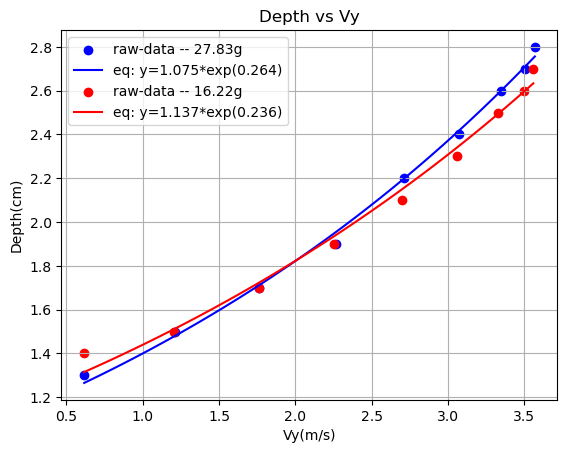

In [50]:
y_pred1 = model(vy, a_fit1, b_fit1)

ss_res1 = np.sum((D - y_pred1)**2)
ss_tot1 = np.sum((D - np.mean(D))**2)
r_squared1 = 1 - ss_res1/ss_tot1

plt.scatter(vy, D, label='raw-data -- 27.83g', color='blue')
plt.plot(x1, y1, label=f'eq: y={a_fit1:.3f}*exp({b_fit1:.3f})', color='blue')
plt.title('Depth vs Vy')
plt.xlabel('Vy(m/s)')
plt.ylabel('Depth(cm)')

y_pred1_ = model(vy1, a_fit1_, b_fit1_)

ss_res1_ = np.sum((D1 - y_pred1_)**2)
ss_tot1_ = np.sum((D1 - np.mean(D1))**2)
r_squared1_ = 1 - ss_res1_/ss_tot1_

plt.scatter(vy1, D1, label='raw-data -- 16.22g', color='red')
plt.plot(x1_, y1_, label=f'eq: y={a_fit1_:.3f}*exp({b_fit1_:.3f})', color='red')
plt.grid()
plt.legend()

print(f'27.83g --R_squared={r_squared1:.3f}')
print(f'16.22g --R_squared={r_squared1_:.3f}')

In [51]:
v_avg = 3.55

def dmg(the):
    return a_fit*a_fit1*np.exp(v_avg*(b_fit*np.cos(the) + b_fit1*np.sin(the)))

def dmg2(the):
    return a_fit_*a_fit1_*np.exp(v_avg*(b_fit_*np.cos(the) + b_fit1_*np.sin(the)))

In [57]:
the1_ = np.linspace(0, np.pi/2, 100)
Dmg = dmg(the1_)
Dmg_raw = D*L

Dmg_ = dmg2(the1_)
Dmg_raw_ = D1*L1

27.83g --R_squared=0.978
16.22g --R_squared=0.976


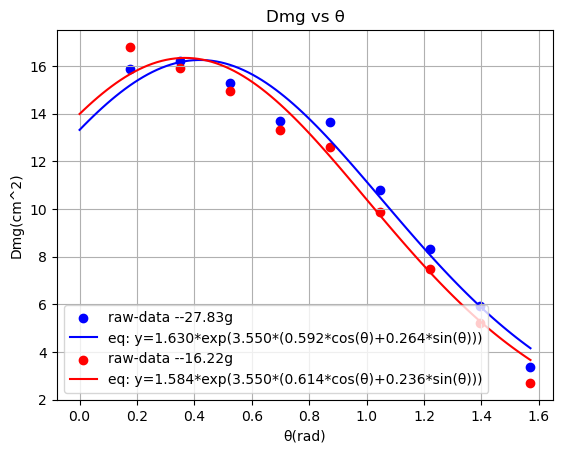

In [60]:
Dmg_pred = dmg(the)

ss_res2 = np.sum((Dmg_raw - Dmg_pred)**2)
ss_tot2 = np.sum((Dmg_raw - np.mean(Dmg_raw))**2)
r_squared2 = 1 - ss_res2/ss_tot2

Dmg_pred_ = dmg2(the1)

ss_res2_ = np.sum((Dmg_raw_ - Dmg_pred_)**2)
ss_tot2_ = np.sum((Dmg_raw_ - np.mean(Dmg_raw_))**2)
r_squared2_ = 1 - ss_res2_/ss_tot2_

plt.scatter(the, Dmg_raw, label='raw-data --27.83g', color='blue')
plt.plot(the1_, Dmg, label=f'eq: y={a_fit*a_fit1:.3f}*exp({v_avg:.3f}*({b_fit:.3f}*cos(θ)+{b_fit1:.3f}*sin(θ)))', color='blue')
plt.scatter(the1, Dmg_raw_, label='raw-data --16.22g', color='red')
plt.plot(the1_, Dmg_, label=f'eq: y={a_fit_*a_fit1_:.3f}*exp({v_avg:.3f}*({b_fit_:.3f}*cos(θ)+{b_fit1_:.3f}*sin(θ)))', color='red')

plt.grid()
plt.title('Dmg vs θ')
plt.xlabel('θ(rad)')
plt.ylabel('Dmg(cm^2)')
plt.legend()

print(f'27.83g --R_squared={r_squared2:.3f}')
print(f'16.22g --R_squared={r_squared2_:.3f}')